In [1]:
import pandas as pd
import numpy as np

In [2]:
crime_police = pd.read_csv('data/2000년부터2020년까지_경찰서별 5대범죄 발생 검거 현황_12_31_2020.csv', encoding='cp949')
crime_police.head(10)

,구분,죄종,발생검거,건수
0,중부,살인,발생,1
1,중부,살인,검거,1
2,중부,강도,발생,3
3,중부,강도,검거,4
4,중부,"강간,추행",발생,113
5,중부,"강간,추행",검거,76
6,중부,절도,발생,943
7,중부,절도,검거,495
8,중부,폭력,발생,997
9,중부,폭력,검거,830


중부를 뭉치는 태크닉

In [3]:
crime_police.set_index(['구분','죄종','발생검거'],inplace=True)
crime_police.head(10)

건수
구분 죄종    발생검거     
중부 살인    발생      1
         검거      1
   강도    발생      3
         검거      4
   강간,추행 발생    113
         검거     76
   절도    발생    943
         검거    495
   폭력    발생    997
         검거    830

In [4]:
crime_police = crime_police.unstack(-1) #index 올리기
crime_police.head(10)

건수      
발생검거        검거    발생
구분 죄종               
강남 강간,추행   433   513
   강도       10    12
   살인        3     5
   절도     1016  1941
   폭력     1911  2283
강동 강간,추행   167   188
   강도       14    15
   살인        3     3
   절도      781  1640
   폭력     1697  1942

In [5]:
crime_police = crime_police.unstack(-1) #한번더 올리기
crime_police.head(10)

건수                                                                    \
발생검거  검거                                     발생                              
죄종    강간  강간,추행    강도    살인      절도      폭력  강간  강간,추행    강도    살인      절도   
구분                                                                           
강남   NaN  433.0  10.0   3.0  1016.0  1911.0 NaN  513.0  12.0   5.0  1941.0   
강동   NaN  167.0  14.0   3.0   781.0  1697.0 NaN  188.0  15.0   3.0  1640.0   
강북   NaN  132.0   4.0   8.0   490.0  1625.0 NaN  159.0   5.0   9.0   780.0   
강서   NaN  222.0   5.0   9.0  1070.0  2087.0 NaN  265.0   6.0  10.0  1689.0   
관악   NaN  351.0   3.0  12.0  1137.0  2355.0 NaN  403.0   3.0  12.0  2229.0   
광진   NaN  224.0   4.0   2.0   874.0  1407.0 NaN  255.0   4.0   2.0  1664.0   
구로   NaN  142.0   5.0   6.0  1008.0  1823.0 NaN  197.0   5.0   6.0  1763.0   
금천   NaN   93.0   6.0   4.0   553.0  1310.0 NaN  117.0   7.0   4.0   999.0   
남대문  NaN   52.0   2.0   1.0   368.0   494.0 NaN   73.0   2.0   1.0   699.0   
노원   NaN  148.0   3.0   3.0   646.0  1781.0 NaN  169.0   3.0   4.0  1404.0   

              
발생검거          
죄종        폭력  
구분            
강남    2283.0  
강동    1942.0  
강북    1817.0  
강서    2445.0  
관악    2614.0  
광진    1676.0  
구로    2204.0  
금천    1471.0  
남대문    579.0  
노원    2163.0

In [6]:
crime_police = crime_police.droplevel(0, axis=1) # 건수 날리기
crime_police.head(10)

발생검거  검거                                     발생                             \
죄종    강간  강간,추행    강도    살인      절도      폭력  강간  강간,추행    강도    살인      절도   
구분                                                                           
강남   NaN  433.0  10.0   3.0  1016.0  1911.0 NaN  513.0  12.0   5.0  1941.0   
강동   NaN  167.0  14.0   3.0   781.0  1697.0 NaN  188.0  15.0   3.0  1640.0   
강북   NaN  132.0   4.0   8.0   490.0  1625.0 NaN  159.0   5.0   9.0   780.0   
강서   NaN  222.0   5.0   9.0  1070.0  2087.0 NaN  265.0   6.0  10.0  1689.0   
관악   NaN  351.0   3.0  12.0  1137.0  2355.0 NaN  403.0   3.0  12.0  2229.0   
광진   NaN  224.0   4.0   2.0   874.0  1407.0 NaN  255.0   4.0   2.0  1664.0   
구로   NaN  142.0   5.0   6.0  1008.0  1823.0 NaN  197.0   5.0   6.0  1763.0   
금천   NaN   93.0   6.0   4.0   553.0  1310.0 NaN  117.0   7.0   4.0   999.0   
남대문  NaN   52.0   2.0   1.0   368.0   494.0 NaN   73.0   2.0   1.0   699.0   
노원   NaN  148.0   3.0   3.0   646.0  1781.0 NaN  169.0   3.0   4.0  1404.0   

발생검거          
죄종        폭력  
구분            
강남    2283.0  
강동    1942.0  
강북    1817.0  
강서    2445.0  
관악    2614.0  
광진    1676.0  
구로    2204.0  
금천    1471.0  
남대문    579.0  
노원    2163.0

In [7]:
col_dict1 = ['버릴것검거','강간검거', '강도검거', '살인검거', '절도검거', '폭력검거']
col_dict2 = ['버릴것발생','강간발생', '강도발생', '살인발생', '절도발생', '폭력발생']
c1 = crime_police['검거'].rename(columns={crime_police['검거'].columns[i]:j for i, j in enumerate(col_dict1)})
c2 = crime_police['발생'].rename(columns={crime_police['발생'].columns[i]:j for i, j in enumerate(col_dict2)})
crime_police = pd.merge(c1, c2, on='구분')
crime_police.head()

죄종,버릴것검거,강간검거,강도검거,살인검거,절도검거,폭력검거,버릴것발생,강간발생,강도발생,살인발생,절도발생,폭력발생
구분,,,,,,,,,,,,
강남,NaN,433.0,10.0,3.0,1016.0,1911.0,NaN,513.0,12.0,5.0,1941.0,2283.0
강동,NaN,167.0,14.0,3.0,781.0,1697.0,NaN,188.0,15.0,3.0,1640.0,1942.0
강북,NaN,132.0,4.0,8.0,490.0,1625.0,NaN,159.0,5.0,9.0,780.0,1817.0
강서,NaN,222.0,5.0,9.0,1070.0,2087.0,NaN,265.0,6.0,10.0,1689.0,2445.0
관악,NaN,351.0,3.0,12.0,1137.0,2355.0,NaN,403.0,3.0,12.0,2229.0,2614.0


In [8]:
# 컬럼 쉽게 지우는 법
del crime_police['버릴것검거']
del crime_police['버릴것발생']
crime_police.head()

죄종,강간검거,강도검거,살인검거,절도검거,폭력검거,강간발생,강도발생,살인발생,절도발생,폭력발생
구분,,,,,,,,,,
강남,433.0,10.0,3.0,1016.0,1911.0,513.0,12.0,5.0,1941.0,2283.0
강동,167.0,14.0,3.0,781.0,1697.0,188.0,15.0,3.0,1640.0,1942.0
강북,132.0,4.0,8.0,490.0,1625.0,159.0,5.0,9.0,780.0,1817.0
강서,222.0,5.0,9.0,1070.0,2087.0,265.0,6.0,10.0,1689.0,2445.0
관악,351.0,3.0,12.0,1137.0,2355.0,403.0,3.0,12.0,2229.0,2614.0


In [9]:
#구글맴에 api사용하는법
import googlemaps

In [10]:
gmaps_key = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX'
gmaps = googlemaps.Client(key=gmaps_key)

In [11]:
gmaps.geocode('서울중부경찰서', language='ko')

[{'address_components': [{'long_name': '27',
    'short_name': '27',
    'types': ['premise']},
   {'long_name': '수표로',
    'short_name': '수표로',
    'types': ['political', 'sublocality', 'sublocality_level_4']},
   {'long_name': '중구',
    'short_name': '중구',
    'types': ['political', 'sublocality', 'sublocality_level_1']},
   {'long_name': '서울특별시',
    'short_name': '서울특별시',
    'types': ['administrative_area_level_1', 'political']},
   {'long_name': '대한민국',
    'short_name': 'KR',
    'types': ['country', 'political']},
   {'long_name': '100-032',
    'short_name': '100-032',
    'types': ['postal_code']}],
  'formatted_address': '대한민국 서울특별시 중구 수표로 27',
  'geometry': {'location': {'lat': 37.56361709999999, 'lng': 126.9896517},
   'location_type': 'ROOFTOP',
   'viewport': {'northeast': {'lat': 37.5649660802915,
     'lng': 126.9910006802915},
    'southwest': {'lat': 37.5622681197085, 'lng': 126.9883027197085}}},
  'partial_match': True,
  'place_id': 'ChIJc-9q5uSifDURLhQmr5wkXmc',
 

In [15]:
station_name=[]
for name in crime_police.index:
    station_name.append('서울'+str(name)+'경찰서')
    
station_name

['서울강남경찰서',
 '서울강동경찰서',
 '서울강북경찰서',
 '서울강서경찰서',
 '서울관악경찰서',
 '서울광진경찰서',
 '서울구로경찰서',
 '서울금천경찰서',
 '서울남대문경찰서',
 '서울노원경찰서',
 '서울도봉경찰서',
 '서울동대문경찰서',
 '서울동작경찰서',
 '서울마포경찰서',
 '서울방배경찰서',
 '서울서대문경찰서',
 '서울서부경찰서',
 '서울서초경찰서',
 '서울성동경찰서',
 '서울성북경찰서',
 '서울송파경찰서',
 '서울수서경찰서',
 '서울양천경찰서',
 '서울영등포경찰서',
 '서울용산경찰서',
 '서울은평경찰서',
 '서울종로경찰서',
 '서울종암경찰서',
 '서울중랑경찰서',
 '서울중부경찰서',
 '서울혜화경찰서']

In [18]:
from tqdm.notebook import tqdm #로딩바 해주는 역할

station_address=[]
station_lat = []
station_lng = []

for name in tqdm(station_name):
    tmp = gmaps.geocode(name, language='ko')
    station_address.append(tmp[0].get('formatted_address')) #딕션어리에서 값을가져올때 get으로 가져옴
    
    tmp_loc = tmp[0].get('geometry')
    station_lat.append(tmp_loc['location']['lat'])
    station_lng.append(tmp_loc['location']['lng'])
    print(name,':',tmp[0].get('formatted_address'))

  0%|          | 0/31 [00:00<?, ?it/s]

서울강남경찰서 : 대한민국 서울특별시 강남구 테헤란로114길 11
서울강동경찰서 : 대한민국 서울특별시 강동구 성내로 57
서울강북경찰서 : 대한민국 서울특별시 강북구 오패산로 406
서울강서경찰서 : 대한민국 서울특별시 양천구 신월동 화곡로 73
서울관악경찰서 : 대한민국 서울특별시 관악구 관악로5길 33
서울광진경찰서 : 대한민국 서울특별시 광진구 구의동 자양로 167
서울구로경찰서 : 대한민국 서울특별시 구로구 새말로 97 신도림테크노마트 5층
서울금천경찰서 : 대한민국 서울특별시 금천구 시흥대로73길 50
서울남대문경찰서 : 대한민국 서울특별시 중구 한강대로 410
서울노원경찰서 : 대한민국 서울특별시 노원구 노원로 283
서울도봉경찰서 : 대한민국 서울특별시 도봉구 노해로 403
서울동대문경찰서 : 대한민국 서울특별시 동대문구 약령시로21길 29
서울동작경찰서 : 대한민국 서울특별시 동작구 노량진로 148
서울마포경찰서 : 대한민국 서울특별시 마포구 마포대로 183
서울방배경찰서 : 대한민국 서울특별시 서초구 동작대로 204
서울서대문경찰서 : 대한민국 서울특별시 서대문구 통일로 113
서울서부경찰서 : 대한민국 서울특별시 은평구 진흥로 58
서울서초경찰서 : 대한민국 서울특별시 서초구 서초3동 반포대로 179
서울성동경찰서 : 대한민국 서울특별시 성동구 행당동 왕십리광장로 9
서울성북경찰서 : 대한민국 서울특별시 성북구 삼선동 보문로 170
서울송파경찰서 : 대한민국 서울특별시 송파구 중대로 221
서울수서경찰서 : 대한민국 서울특별시 강남구 개포로 617
서울양천경찰서 : 대한민국 서울특별시 양천구 목동동로 99
서울영등포경찰서 : 대한민국 서울특별시 영등포구 국회대로 608
서울용산경찰서 : 대한민국 서울특별시 용산구 백범로 329
서울은평경찰서 : 대한민국 서울특별시 은평구 연서로 365
서울종로경찰서 : 대한민국 서울특별시 종로구 인사동5길 41
서울종암경찰서 : 대한민국 서울특별시 성북구 월곡제2동 94-5
서울중랑경찰서 : 대한민국 서울특

In [19]:
station_address

['대한민국 서울특별시 강남구 테헤란로114길 11',
 '대한민국 서울특별시 강동구 성내로 57',
 '대한민국 서울특별시 강북구 오패산로 406',
 '대한민국 서울특별시 양천구 신월동 화곡로 73',
 '대한민국 서울특별시 관악구 관악로5길 33',
 '대한민국 서울특별시 광진구 구의동 자양로 167',
 '대한민국 서울특별시 구로구 새말로 97 신도림테크노마트 5층',
 '대한민국 서울특별시 금천구 시흥대로73길 50',
 '대한민국 서울특별시 중구 한강대로 410',
 '대한민국 서울특별시 노원구 노원로 283',
 '대한민국 서울특별시 도봉구 노해로 403',
 '대한민국 서울특별시 동대문구 약령시로21길 29',
 '대한민국 서울특별시 동작구 노량진로 148',
 '대한민국 서울특별시 마포구 마포대로 183',
 '대한민국 서울특별시 서초구 동작대로 204',
 '대한민국 서울특별시 서대문구 통일로 113',
 '대한민국 서울특별시 은평구 진흥로 58',
 '대한민국 서울특별시 서초구 서초3동 반포대로 179',
 '대한민국 서울특별시 성동구 행당동 왕십리광장로 9',
 '대한민국 서울특별시 성북구 삼선동 보문로 170',
 '대한민국 서울특별시 송파구 중대로 221',
 '대한민국 서울특별시 강남구 개포로 617',
 '대한민국 서울특별시 양천구 목동동로 99',
 '대한민국 서울특별시 영등포구 국회대로 608',
 '대한민국 서울특별시 용산구 백범로 329',
 '대한민국 서울특별시 은평구 연서로 365',
 '대한민국 서울특별시 종로구 인사동5길 41',
 '대한민국 서울특별시 성북구 월곡제2동 94-5',
 '대한민국 서울특별시 중랑구 묵제2동 249-2',
 '대한민국 서울특별시 중구 수표로 27',
 '대한민국 서울특별시 종로구 창경궁로 112-16']

In [21]:
gu_name = []
for name in station_address:
    tmp = name.split()  #리스트로 쪼개고 
    tmp_gu = [gu for gu in tmp if gu[-1] == '구'][0]  #하나씩 끄집어내고 마지막 글자가 '구'인 놈을 끄집어냄
    gu_name.append(tmp_gu)
    
    
crime_police['구별'] = gu_name
crime_police.head(10)

죄종,강간검거,강도검거,살인검거,절도검거,폭력검거,강간발생,강도발생,살인발생,절도발생,폭력발생,구별
구분,,,,,,,,,,,
강남,433.0,10.0,3.0,1016.0,1911.0,513.0,12.0,5.0,1941.0,2283.0,강남구
강동,167.0,14.0,3.0,781.0,1697.0,188.0,15.0,3.0,1640.0,1942.0,강동구
강북,132.0,4.0,8.0,490.0,1625.0,159.0,5.0,9.0,780.0,1817.0,강북구
강서,222.0,5.0,9.0,1070.0,2087.0,265.0,6.0,10.0,1689.0,2445.0,양천구
관악,351.0,3.0,12.0,1137.0,2355.0,403.0,3.0,12.0,2229.0,2614.0,관악구
광진,224.0,4.0,2.0,874.0,1407.0,255.0,4.0,2.0,1664.0,1676.0,광진구
구로,142.0,5.0,6.0,1008.0,1823.0,197.0,5.0,6.0,1763.0,2204.0,구로구
금천,93.0,6.0,4.0,553.0,1310.0,117.0,7.0,4.0,999.0,1471.0,금천구
남대문,52.0,2.0,1.0,368.0,494.0,73.0,2.0,1.0,699.0,579.0,중구


In [22]:
crime_police.reset_index(drop=False, inplace=True)
crime_police

죄종,구분,강간검거,강도검거,살인검거,절도검거,폭력검거,강간발생,강도발생,살인발생,절도발생,폭력발생,구별
0,강남,433.0,10.0,3.0,1016.0,1911.0,513.0,12.0,5.0,1941.0,2283.0,강남구
1,강동,167.0,14.0,3.0,781.0,1697.0,188.0,15.0,3.0,1640.0,1942.0,강동구
2,강북,132.0,4.0,8.0,490.0,1625.0,159.0,5.0,9.0,780.0,1817.0,강북구
3,강서,222.0,5.0,9.0,1070.0,2087.0,265.0,6.0,10.0,1689.0,2445.0,양천구
4,관악,351.0,3.0,12.0,1137.0,2355.0,403.0,3.0,12.0,2229.0,2614.0,관악구
5,광진,224.0,4.0,2.0,874.0,1407.0,255.0,4.0,2.0,1664.0,1676.0,광진구
6,구로,142.0,5.0,6.0,1008.0,1823.0,197.0,5.0,6.0,1763.0,2204.0,구로구
7,금천,93.0,6.0,4.0,553.0,1310.0,117.0,7.0,4.0,999.0,1471.0,금천구
8,남대문,52.0,2.0,1.0,368.0,494.0,73.0,2.0,1.0,699.0,579.0,중구
9,노원,148.0,3.0,3.0,646.0,1781.0,169.0,3.0,4.0,1404.0,2163.0,노원구


In [23]:
#NaN 값을 0으로 변경
crime_police = crime_police.fillna(0)
crime_police

죄종,구분,강간검거,강도검거,살인검거,절도검거,폭력검거,강간발생,강도발생,살인발생,절도발생,폭력발생,구별
0,강남,433.0,10.0,3.0,1016.0,1911.0,513.0,12.0,5.0,1941.0,2283.0,강남구
1,강동,167.0,14.0,3.0,781.0,1697.0,188.0,15.0,3.0,1640.0,1942.0,강동구
2,강북,132.0,4.0,8.0,490.0,1625.0,159.0,5.0,9.0,780.0,1817.0,강북구
3,강서,222.0,5.0,9.0,1070.0,2087.0,265.0,6.0,10.0,1689.0,2445.0,양천구
4,관악,351.0,3.0,12.0,1137.0,2355.0,403.0,3.0,12.0,2229.0,2614.0,관악구
5,광진,224.0,4.0,2.0,874.0,1407.0,255.0,4.0,2.0,1664.0,1676.0,광진구
6,구로,142.0,5.0,6.0,1008.0,1823.0,197.0,5.0,6.0,1763.0,2204.0,구로구
7,금천,93.0,6.0,4.0,553.0,1310.0,117.0,7.0,4.0,999.0,1471.0,금천구
8,남대문,52.0,2.0,1.0,368.0,494.0,73.0,2.0,1.0,699.0,579.0,중구
9,노원,148.0,3.0,3.0,646.0,1781.0,169.0,3.0,4.0,1404.0,2163.0,노원구


In [25]:
#구별 기준으로 sum하고 싶음
crime_anal = pd.pivot_table(crime_police, index='구별', aggfunc=np.sum)
crime_anal

/var/folders/xf/2ksg4w5n0598m6cy2w06tnpw0000gn/T/ipykernel_57013/1358890546.py:2: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  crime_anal = pd.pivot_table(crime_police, index='구별', aggfunc=np.sum)


죄종,강간검거,강간발생,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생
구별,,,,,,,,,,
강남구,627.0,708.0,11.0,14.0,5.0,6.0,1491.0,2951.0,3111.0,3677.0
강동구,167.0,188.0,14.0,15.0,3.0,3.0,781.0,1640.0,1697.0,1942.0
강북구,132.0,159.0,4.0,5.0,8.0,9.0,490.0,780.0,1625.0,1817.0
관악구,351.0,403.0,3.0,3.0,12.0,12.0,1137.0,2229.0,2355.0,2614.0
광진구,224.0,255.0,4.0,4.0,2.0,2.0,874.0,1664.0,1407.0,1676.0
구로구,142.0,197.0,5.0,5.0,6.0,6.0,1008.0,1763.0,1823.0,2204.0
금천구,93.0,117.0,6.0,7.0,4.0,4.0,553.0,999.0,1310.0,1471.0
노원구,148.0,169.0,3.0,3.0,3.0,4.0,646.0,1404.0,1781.0,2163.0
도봉구,0.0,0.0,2.0,2.0,0.0,0.0,379.0,861.0,1022.0,1234.0


In [26]:
crime_anal['강간검거율'] = crime_anal['강간검거'] / crime_anal['강간발생'] *100
crime_anal['강도검거율'] = crime_anal['강도검거'] / crime_anal['강도발생'] *100
crime_anal['살인검거율'] = crime_anal['살인검거'] / crime_anal['살인발생'] *100
crime_anal['절도검거율'] = crime_anal['절도검거'] / crime_anal['절도발생'] *100
crime_anal['폭력검거율'] = crime_anal['폭력검거'] / crime_anal['폭력발생'] *100

In [27]:
crime_anal

죄종,강간검거,강간발생,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,,,,,,
강남구,627.0,708.0,11.0,14.0,5.0,6.0,1491.0,2951.0,3111.0,3677.0,88.559322,78.571429,83.333333,50.525246,84.607017
강동구,167.0,188.0,14.0,15.0,3.0,3.0,781.0,1640.0,1697.0,1942.0,88.829787,93.333333,100.000000,47.621951,87.384140
강북구,132.0,159.0,4.0,5.0,8.0,9.0,490.0,780.0,1625.0,1817.0,83.018868,80.000000,88.888889,62.820513,89.433132
관악구,351.0,403.0,3.0,3.0,12.0,12.0,1137.0,2229.0,2355.0,2614.0,87.096774,100.000000,100.000000,51.009421,90.091813
광진구,224.0,255.0,4.0,4.0,2.0,2.0,874.0,1664.0,1407.0,1676.0,87.843137,100.000000,100.000000,52.524038,83.949881
구로구,142.0,197.0,5.0,5.0,6.0,6.0,1008.0,1763.0,1823.0,2204.0,72.081218,100.000000,100.000000,57.175269,82.713249
금천구,93.0,117.0,6.0,7.0,4.0,4.0,553.0,999.0,1310.0,1471.0,79.487179,85.714286,100.000000,55.355355,89.055065
노원구,148.0,169.0,3.0,3.0,3.0,4.0,646.0,1404.0,1781.0,2163.0,87.573964,100.000000,75.000000,46.011396,82.339344
도봉구,0.0,0.0,2.0,2.0,0.0,0.0,379.0,861.0,1022.0,1234.0,NaN,100.000000,NaN,44.018583,82.820097


In [28]:
crime_anal = crime_anal.fillna(0)
crime_anal

죄종,강간검거,강간발생,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,,,,,,
강남구,627.0,708.0,11.0,14.0,5.0,6.0,1491.0,2951.0,3111.0,3677.0,88.559322,78.571429,83.333333,50.525246,84.607017
강동구,167.0,188.0,14.0,15.0,3.0,3.0,781.0,1640.0,1697.0,1942.0,88.829787,93.333333,100.000000,47.621951,87.384140
강북구,132.0,159.0,4.0,5.0,8.0,9.0,490.0,780.0,1625.0,1817.0,83.018868,80.000000,88.888889,62.820513,89.433132
관악구,351.0,403.0,3.0,3.0,12.0,12.0,1137.0,2229.0,2355.0,2614.0,87.096774,100.000000,100.000000,51.009421,90.091813
광진구,224.0,255.0,4.0,4.0,2.0,2.0,874.0,1664.0,1407.0,1676.0,87.843137,100.000000,100.000000,52.524038,83.949881
구로구,142.0,197.0,5.0,5.0,6.0,6.0,1008.0,1763.0,1823.0,2204.0,72.081218,100.000000,100.000000,57.175269,82.713249
금천구,93.0,117.0,6.0,7.0,4.0,4.0,553.0,999.0,1310.0,1471.0,79.487179,85.714286,100.000000,55.355355,89.055065
노원구,148.0,169.0,3.0,3.0,3.0,4.0,646.0,1404.0,1781.0,2163.0,87.573964,100.000000,75.000000,46.011396,82.339344
도봉구,0.0,0.0,2.0,2.0,0.0,0.0,379.0,861.0,1022.0,1234.0,0.000000,100.000000,0.000000,44.018583,82.820097


In [29]:
del crime_anal['강간검거']
del crime_anal['강도검거']
del crime_anal['살인검거']
del crime_anal['절도검거']
del crime_anal['폭력검거']

In [30]:
crime_anal

죄종,강간발생,강도발생,살인발생,절도발생,폭력발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,708.0,14.0,6.0,2951.0,3677.0,88.559322,78.571429,83.333333,50.525246,84.607017
강동구,188.0,15.0,3.0,1640.0,1942.0,88.829787,93.333333,100.000000,47.621951,87.384140
강북구,159.0,5.0,9.0,780.0,1817.0,83.018868,80.000000,88.888889,62.820513,89.433132
관악구,403.0,3.0,12.0,2229.0,2614.0,87.096774,100.000000,100.000000,51.009421,90.091813
광진구,255.0,4.0,2.0,1664.0,1676.0,87.843137,100.000000,100.000000,52.524038,83.949881
구로구,197.0,5.0,6.0,1763.0,2204.0,72.081218,100.000000,100.000000,57.175269,82.713249
금천구,117.0,7.0,4.0,999.0,1471.0,79.487179,85.714286,100.000000,55.355355,89.055065
노원구,169.0,3.0,4.0,1404.0,2163.0,87.573964,100.000000,75.000000,46.011396,82.339344
도봉구,0.0,2.0,0.0,861.0,1234.0,0.000000,100.000000,0.000000,44.018583,82.820097


In [31]:
col_list = ['강간검거율','강도검거율','살인검거율','절도검거율','폭력검거율']
for column in col_list:
    crime_anal.loc[crime_anal[column]>100,column] =100
    
crime_anal

죄종,강간발생,강도발생,살인발생,절도발생,폭력발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,708.0,14.0,6.0,2951.0,3677.0,88.559322,78.571429,83.333333,50.525246,84.607017
강동구,188.0,15.0,3.0,1640.0,1942.0,88.829787,93.333333,100.000000,47.621951,87.384140
강북구,159.0,5.0,9.0,780.0,1817.0,83.018868,80.000000,88.888889,62.820513,89.433132
관악구,403.0,3.0,12.0,2229.0,2614.0,87.096774,100.000000,100.000000,51.009421,90.091813
광진구,255.0,4.0,2.0,1664.0,1676.0,87.843137,100.000000,100.000000,52.524038,83.949881
구로구,197.0,5.0,6.0,1763.0,2204.0,72.081218,100.000000,100.000000,57.175269,82.713249
금천구,117.0,7.0,4.0,999.0,1471.0,79.487179,85.714286,100.000000,55.355355,89.055065
노원구,169.0,3.0,4.0,1404.0,2163.0,87.573964,100.000000,75.000000,46.011396,82.339344
도봉구,0.0,2.0,0.0,861.0,1234.0,0.000000,100.000000,0.000000,44.018583,82.820097


In [33]:
crime_anal.rename(columns={'강간발생': '강간',
                         '강도발생': '강도',
                         '살인발생': '살인',
                         '절도발생': '절도',
                         '폭력발생': '폭력'}, inplace=True)
crime_anal

죄종,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,708.0,14.0,6.0,2951.0,3677.0,88.559322,78.571429,83.333333,50.525246,84.607017
강동구,188.0,15.0,3.0,1640.0,1942.0,88.829787,93.333333,100.000000,47.621951,87.384140
강북구,159.0,5.0,9.0,780.0,1817.0,83.018868,80.000000,88.888889,62.820513,89.433132
관악구,403.0,3.0,12.0,2229.0,2614.0,87.096774,100.000000,100.000000,51.009421,90.091813
광진구,255.0,4.0,2.0,1664.0,1676.0,87.843137,100.000000,100.000000,52.524038,83.949881
구로구,197.0,5.0,6.0,1763.0,2204.0,72.081218,100.000000,100.000000,57.175269,82.713249
금천구,117.0,7.0,4.0,999.0,1471.0,79.487179,85.714286,100.000000,55.355355,89.055065
노원구,169.0,3.0,4.0,1404.0,2163.0,87.573964,100.000000,75.000000,46.011396,82.339344
도봉구,0.0,2.0,0.0,861.0,1234.0,0.000000,100.000000,0.000000,44.018583,82.820097


정규화 0~1 사이 상대값



n =30 일때  

 x1 x2 x3 ... x30  
 
 xmax  
 xmin  
 
 min-max scaling  
 
 xi - xmin / xmax - xmin

In [35]:
from sklearn import preprocessing

In [37]:
col = ['강간','강도','살인','절도','폭력']
x = crime_anal[col].values

In [40]:
print(type(x)) #numpy 타입

<class 'numpy.ndarray'>


In [41]:
print(x.dtype) #원소는 float 타입

float64


In [42]:
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
x_scaled

array([[1.        , 0.92857143, 0.4       , 0.89488871, 0.87517832],
       [0.26553672, 1.        , 0.2       , 0.35449299, 0.2564194 ],
       [0.22457627, 0.28571429, 0.6       , 0.        , 0.21184023],
       [0.56920904, 0.14285714, 0.8       , 0.59727947, 0.49607703],
       [0.36016949, 0.21428571, 0.13333333, 0.36438582, 0.16155492],
       [0.27824859, 0.28571429, 0.4       , 0.40519373, 0.34985735],
       [0.16525424, 0.42857143, 0.26666667, 0.09027205, 0.08844508],
       [0.23870056, 0.14285714, 0.26666667, 0.25721352, 0.33523538],
       [0.        , 0.07142857, 0.        , 0.03338829, 0.00392297],
       [0.22740113, 0.35714286, 0.66666667, 0.27205276, 0.20007133],
       [0.31920904, 0.        , 0.06666667, 0.23124485, 0.14550642],
       [0.49152542, 0.21428571, 0.6       , 0.28977741, 0.22146933],
       [0.22457627, 0.07142857, 0.2       , 0.12242374, 0.0246077 ],
       [0.47033898, 0.35714286, 0.33333333, 0.51154163, 0.33880171],
       [0.16242938, 0.14285714, 0.

In [43]:
crime_anal_norm = pd.DataFrame(x_scaled, columns=col, index=crime_anal.index)
col2 = ['강간검거율','강도검거율','살인검거율','절도검거율','폭력검거율']
crime_anal_norm[col2] = crime_anal[col2]
crime_anal_norm

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,1.000000,0.928571,0.400000,0.894889,0.875178,88.559322,78.571429,83.333333,50.525246,84.607017
강동구,0.265537,1.000000,0.200000,0.354493,0.256419,88.829787,93.333333,100.000000,47.621951,87.384140
강북구,0.224576,0.285714,0.600000,0.000000,0.211840,83.018868,80.000000,88.888889,62.820513,89.433132
관악구,0.569209,0.142857,0.800000,0.597279,0.496077,87.096774,100.000000,100.000000,51.009421,90.091813
광진구,0.360169,0.214286,0.133333,0.364386,0.161555,87.843137,100.000000,100.000000,52.524038,83.949881
구로구,0.278249,0.285714,0.400000,0.405194,0.349857,72.081218,100.000000,100.000000,57.175269,82.713249
금천구,0.165254,0.428571,0.266667,0.090272,0.088445,79.487179,85.714286,100.000000,55.355355,89.055065
노원구,0.238701,0.142857,0.266667,0.257214,0.335235,87.573964,100.000000,75.000000,46.011396,82.339344
도봉구,0.000000,0.071429,0.000000,0.033388,0.003923,0.000000,100.000000,0.000000,44.018583,82.820097


In [44]:
result_cctv = pd.read_csv('data/cctv_pop_seoul.csv',index_col='구별')
result_cctv

,총계,2011년 이전,2011년,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,,,,,,,,,,,,
종로구,1729,216,7,10,582,210,150,1,259,85,9,200,47.148936,156567,147296,9271,27781,5.921427,17.743841
중구,2001,16,6,199,90,125,218,333,462,228,194,130,205.963303,133708,124552,9156,24767,6.847758,18.523200
용산구,2383,31,3,71,234,125,221,298,351,125,307,617,247.883212,243336,229013,14323,39575,5.886100,16.263520
성동구,3515,487,26,122,207,112,335,309,790,409,262,456,172.692009,298421,291906,6515,45968,2.183157,15.403742
광진구,2556,11,24,57,100,187,98,52,675,465,712,175,435.849057,356191,343392,12799,50370,3.593297,14.141289
동대문구,2315,960,130,146,60,29,111,233,136,197,209,104,61.211699,352570,338875,13695,60868,3.884335,17.264089
중랑구,3285,298,21,23,253,88,138,159,152,173,1050,930,300.121803,396807,392041,4766,69841,1.201088,17.600748
성북구,3754,42,41,87,174,230,323,587,461,860,716,233,318.506132,444295,434826,9469,73158,2.131242,16.466087
강북구,2462,0,0,0,55,85,130,311,34,385,976,486,811.851852,307537,304078,3459,62893,1.124743,20.450547


In [45]:
crime_anal_norm[['인구수', 'cctv']] =result_cctv[['인구수', '총계']]
crime_anal_norm

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,cctv
구별,,,,,,,,,,,,
강남구,1.000000,0.928571,0.400000,0.894889,0.875178,88.559322,78.571429,83.333333,50.525246,84.607017,539538,6645
강동구,0.265537,1.000000,0.200000,0.354493,0.256419,88.829787,93.333333,100.000000,47.621951,87.384140,468815,2547
강북구,0.224576,0.285714,0.600000,0.000000,0.211840,83.018868,80.000000,88.888889,62.820513,89.433132,307537,2462
관악구,0.569209,0.142857,0.800000,0.597279,0.496077,87.096774,100.000000,100.000000,51.009421,90.091813,504140,4909
광진구,0.360169,0.214286,0.133333,0.364386,0.161555,87.843137,100.000000,100.000000,52.524038,83.949881,356191,2556
구로구,0.278249,0.285714,0.400000,0.405194,0.349857,72.081218,100.000000,100.000000,57.175269,82.713249,426675,4075
금천구,0.165254,0.428571,0.266667,0.090272,0.088445,79.487179,85.714286,100.000000,55.355355,89.055065,244564,2365
노원구,0.238701,0.142857,0.266667,0.257214,0.335235,87.573964,100.000000,75.000000,46.011396,82.339344,522225,2282
도봉구,0.000000,0.071429,0.000000,0.033388,0.003923,0.000000,100.000000,0.000000,44.018583,82.820097,323752,1356


In [46]:
col = ['강간','강도','살인','절도','폭력']
crime_anal_norm['범죄'] = np.sum(crime_anal_norm[col], axis=1)
crime_anal_norm

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,cctv,범죄
구별,,,,,,,,,,,,,
강남구,1.000000,0.928571,0.400000,0.894889,0.875178,88.559322,78.571429,83.333333,50.525246,84.607017,539538,6645,4.098638
강동구,0.265537,1.000000,0.200000,0.354493,0.256419,88.829787,93.333333,100.000000,47.621951,87.384140,468815,2547,2.076449
강북구,0.224576,0.285714,0.600000,0.000000,0.211840,83.018868,80.000000,88.888889,62.820513,89.433132,307537,2462,1.322131
관악구,0.569209,0.142857,0.800000,0.597279,0.496077,87.096774,100.000000,100.000000,51.009421,90.091813,504140,4909,2.605423
광진구,0.360169,0.214286,0.133333,0.364386,0.161555,87.843137,100.000000,100.000000,52.524038,83.949881,356191,2556,1.233729
구로구,0.278249,0.285714,0.400000,0.405194,0.349857,72.081218,100.000000,100.000000,57.175269,82.713249,426675,4075,1.719014
금천구,0.165254,0.428571,0.266667,0.090272,0.088445,79.487179,85.714286,100.000000,55.355355,89.055065,244564,2365,1.039209
노원구,0.238701,0.142857,0.266667,0.257214,0.335235,87.573964,100.000000,75.000000,46.011396,82.339344,522225,2282,1.240673
도봉구,0.000000,0.071429,0.000000,0.033388,0.003923,0.000000,100.000000,0.000000,44.018583,82.820097,323752,1356,0.108740


In [48]:
col = ['강간검거율','강도검거율','살인검거율','절도검거율','폭력검거율']
crime_anal_norm['검거'] = np.sum(crime_anal_norm[col], axis=1)
crime_anal_norm

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,cctv,범죄,검거
구별,,,,,,,,,,,,,,
강남구,1.000000,0.928571,0.400000,0.894889,0.875178,88.559322,78.571429,83.333333,50.525246,84.607017,539538,6645,4.098638,385.596346
강동구,0.265537,1.000000,0.200000,0.354493,0.256419,88.829787,93.333333,100.000000,47.621951,87.384140,468815,2547,2.076449,417.169212
강북구,0.224576,0.285714,0.600000,0.000000,0.211840,83.018868,80.000000,88.888889,62.820513,89.433132,307537,2462,1.322131,404.161401
관악구,0.569209,0.142857,0.800000,0.597279,0.496077,87.096774,100.000000,100.000000,51.009421,90.091813,504140,4909,2.605423,428.198009
광진구,0.360169,0.214286,0.133333,0.364386,0.161555,87.843137,100.000000,100.000000,52.524038,83.949881,356191,2556,1.233729,424.317056
구로구,0.278249,0.285714,0.400000,0.405194,0.349857,72.081218,100.000000,100.000000,57.175269,82.713249,426675,4075,1.719014,411.969736
금천구,0.165254,0.428571,0.266667,0.090272,0.088445,79.487179,85.714286,100.000000,55.355355,89.055065,244564,2365,1.039209,409.611885
노원구,0.238701,0.142857,0.266667,0.257214,0.335235,87.573964,100.000000,75.000000,46.011396,82.339344,522225,2282,1.240673,390.924704
도봉구,0.000000,0.071429,0.000000,0.033388,0.003923,0.000000,100.000000,0.000000,44.018583,82.820097,323752,1356,0.108740,226.838680


In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
import platform
from matplotlib import font_manager, rc # Runtime Configuration
path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')


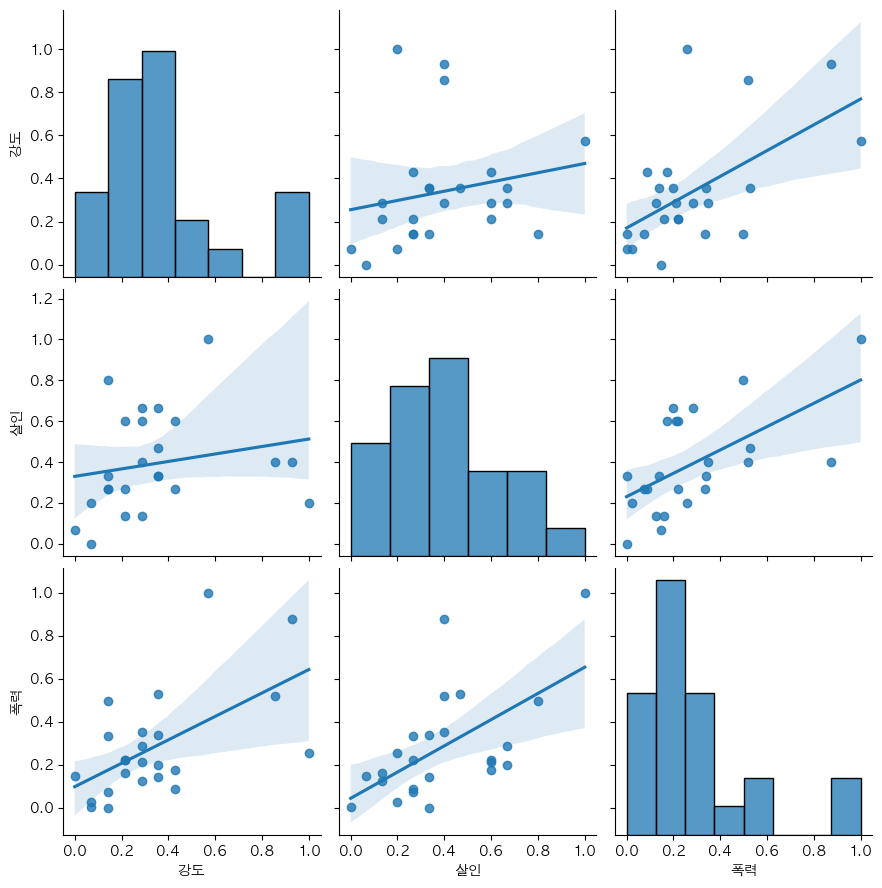

In [52]:
sns.pairplot(crime_anal_norm, vars=['강도', '살인', '폭력'], kind='reg', height=3)
plt.show()

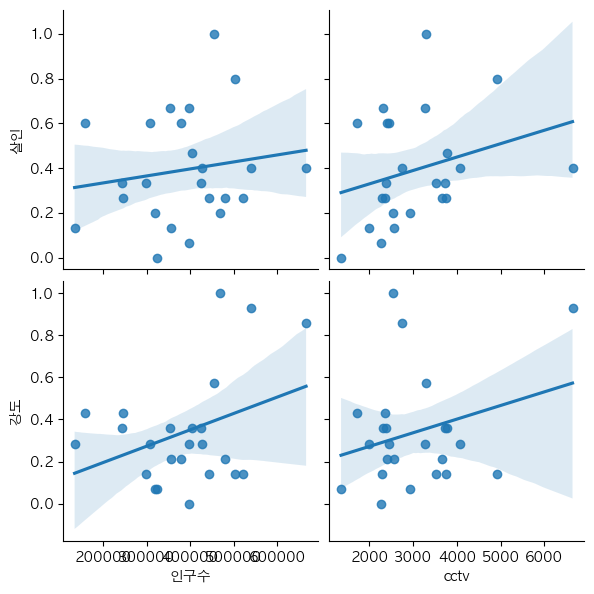

In [55]:
sns.pairplot(crime_anal_norm, x_vars=['인구수','cctv'],y_vars=['살인','강도'], kind='reg', height=3)
plt.yticks(fontname='Arial')  # 음수라서 제거
plt.show()

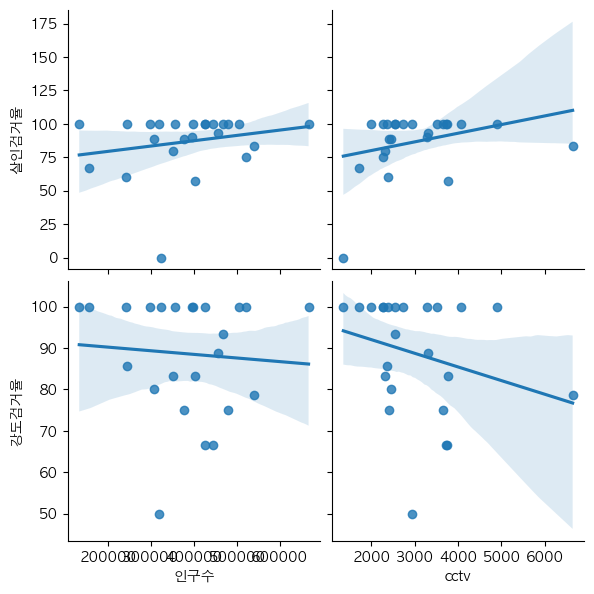

In [56]:
sns.pairplot(crime_anal_norm, x_vars=['인구수','cctv'],y_vars=['살인검거율','강도검거율'], kind='reg', height=3)
plt.yticks(fontname='Arial')  # 음수라서 제거
plt.show()

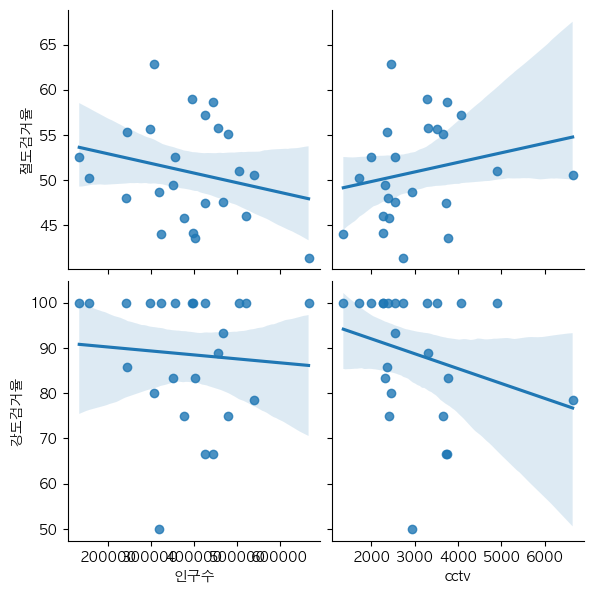

In [57]:
sns.pairplot(crime_anal_norm, x_vars=['인구수','cctv'],y_vars=['절도검거율','강도검거율'], kind='reg', height=3)
plt.yticks(fontname='Arial')  # 음수라서 제거
plt.show()

In [58]:
crime_anal_norm

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,cctv,범죄,검거
구별,,,,,,,,,,,,,,
강남구,1.000000,0.928571,0.400000,0.894889,0.875178,88.559322,78.571429,83.333333,50.525246,84.607017,539538,6645,4.098638,385.596346
강동구,0.265537,1.000000,0.200000,0.354493,0.256419,88.829787,93.333333,100.000000,47.621951,87.384140,468815,2547,2.076449,417.169212
강북구,0.224576,0.285714,0.600000,0.000000,0.211840,83.018868,80.000000,88.888889,62.820513,89.433132,307537,2462,1.322131,404.161401
관악구,0.569209,0.142857,0.800000,0.597279,0.496077,87.096774,100.000000,100.000000,51.009421,90.091813,504140,4909,2.605423,428.198009
광진구,0.360169,0.214286,0.133333,0.364386,0.161555,87.843137,100.000000,100.000000,52.524038,83.949881,356191,2556,1.233729,424.317056
구로구,0.278249,0.285714,0.400000,0.405194,0.349857,72.081218,100.000000,100.000000,57.175269,82.713249,426675,4075,1.719014,411.969736
금천구,0.165254,0.428571,0.266667,0.090272,0.088445,79.487179,85.714286,100.000000,55.355355,89.055065,244564,2365,1.039209,409.611885
노원구,0.238701,0.142857,0.266667,0.257214,0.335235,87.573964,100.000000,75.000000,46.011396,82.339344,522225,2282,1.240673,390.924704
도봉구,0.000000,0.071429,0.000000,0.033388,0.003923,0.000000,100.000000,0.000000,44.018583,82.820097,323752,1356,0.108740,226.838680


In [60]:
tmp_max = crime_anal_norm['검거'].max()
crime_anal_norm['검거'] = crime_anal_norm['검거']/ tmp_max * 100 
crime_anal_norm

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,cctv,범죄,검거
구별,,,,,,,,,,,,,,
강남구,1.000000,0.928571,0.400000,0.894889,0.875178,88.559322,78.571429,83.333333,50.525246,84.607017,539538,6645,4.098638,89.462253
강동구,0.265537,1.000000,0.200000,0.354493,0.256419,88.829787,93.333333,100.000000,47.621951,87.384140,468815,2547,2.076449,96.787477
강북구,0.224576,0.285714,0.600000,0.000000,0.211840,83.018868,80.000000,88.888889,62.820513,89.433132,307537,2462,1.322131,93.769533
관악구,0.569209,0.142857,0.800000,0.597279,0.496077,87.096774,100.000000,100.000000,51.009421,90.091813,504140,4909,2.605423,99.346270
광진구,0.360169,0.214286,0.133333,0.364386,0.161555,87.843137,100.000000,100.000000,52.524038,83.949881,356191,2556,1.233729,98.445849
구로구,0.278249,0.285714,0.400000,0.405194,0.349857,72.081218,100.000000,100.000000,57.175269,82.713249,426675,4075,1.719014,95.581146
금천구,0.165254,0.428571,0.266667,0.090272,0.088445,79.487179,85.714286,100.000000,55.355355,89.055065,244564,2365,1.039209,95.034101
노원구,0.238701,0.142857,0.266667,0.257214,0.335235,87.573964,100.000000,75.000000,46.011396,82.339344,522225,2282,1.240673,90.698486
도봉구,0.000000,0.071429,0.000000,0.033388,0.003923,0.000000,100.000000,0.000000,44.018583,82.820097,323752,1356,0.108740,52.628868


In [61]:
crime_anal_norm_sort  = crime_anal_norm.sort_values(by='검거',ascending=False)
crime_anal_norm_sort

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,cctv,범죄,검거
구별,,,,,,,,,,,,,,
성동구,0.162429,0.142857,0.333333,0.097279,0.000000,85.217391,100.000000,100.000000,55.610236,90.188062,298421,3515,0.735899,100.000000
관악구,0.569209,0.142857,0.800000,0.597279,0.496077,87.096774,100.000000,100.000000,51.009421,90.091813,504140,4909,2.605423,99.346270
광진구,0.360169,0.214286,0.133333,0.364386,0.161555,87.843137,100.000000,100.000000,52.524038,83.949881,356191,2556,1.233729,98.445849
중랑구,0.258475,0.285714,0.666667,0.299258,0.284950,83.606557,100.000000,90.000000,59.030544,85.262117,396807,3285,1.795064,96.956846
강동구,0.265537,1.000000,0.200000,0.354493,0.256419,88.829787,93.333333,100.000000,47.621951,87.384140,468815,2547,2.076449,96.787477
구로구,0.278249,0.285714,0.400000,0.405194,0.349857,72.081218,100.000000,100.000000,57.175269,82.713249,426675,4075,1.719014,95.581146
금천구,0.165254,0.428571,0.266667,0.090272,0.088445,79.487179,85.714286,100.000000,55.355355,89.055065,244564,2365,1.039209,95.034101
송파구,0.405367,0.857143,0.400000,0.679720,0.517832,81.881533,100.000000,100.000000,41.416221,85.233645,667115,2743,2.860061,94.783417
중구,0.262712,0.285714,0.133333,0.355317,0.125892,68.817204,100.000000,100.000000,52.557856,84.010152,133708,2001,1.162968,94.053470


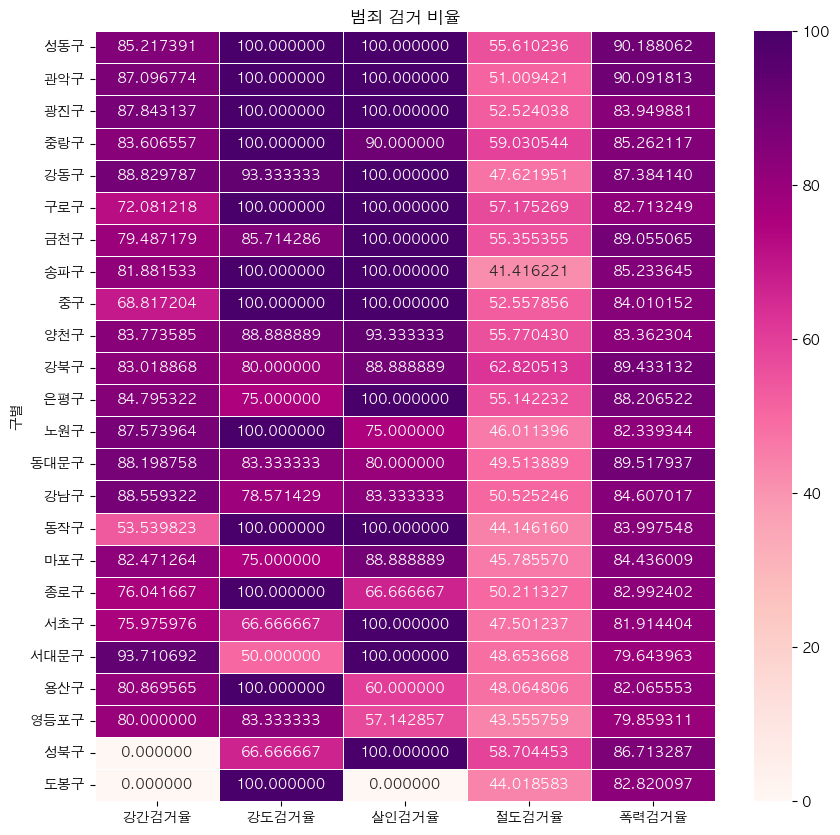

In [65]:
target_col = ['강간검거율','강도검거율','살인검거율','절도검거율','폭력검거율']
plt.figure(figsize=(10,10))
sns.heatmap(crime_anal_norm_sort[target_col], annot=True, fmt='f', linewidth=.5, cmap='RdPu')
plt.title('범죄 검거 비율')
plt.show()

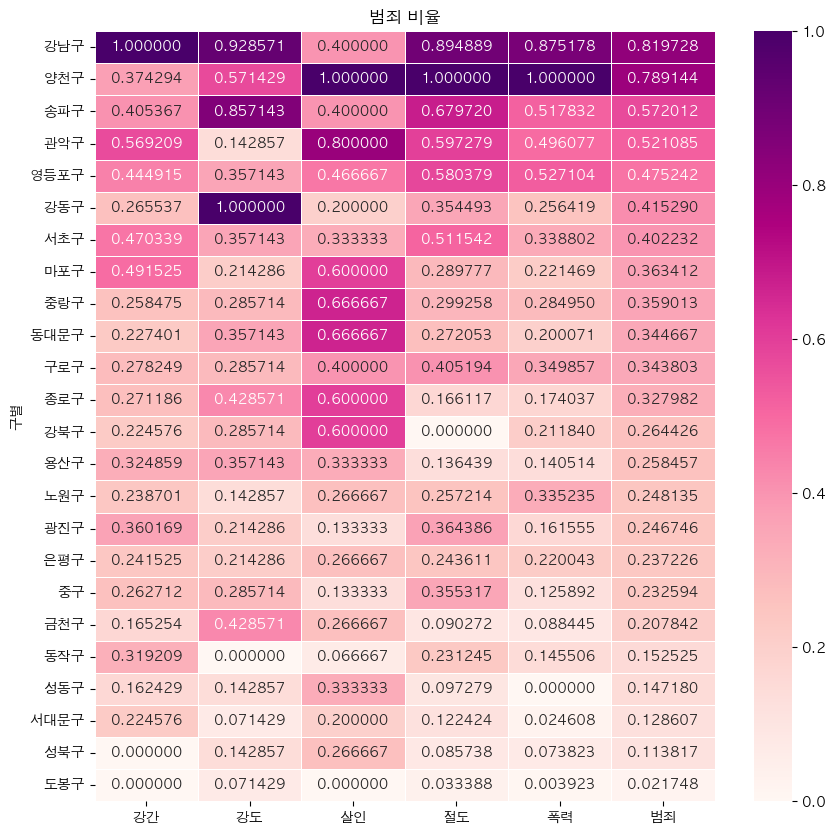

In [66]:
target_col = ['강간','강도','살인','절도','폭력', '범죄']
crime_anal_norm['범죄'] = crime_anal_norm['범죄']/5

crime_anal_norm_sort = crime_anal_norm.sort_values(by='범죄',ascending=False)

plt.figure(figsize=(10,10))
sns.heatmap(crime_anal_norm_sort[target_col], annot=True, fmt='f', linewidth=.5, cmap='RdPu')
plt.title('범죄 비율')
plt.show()